<font size="10"> Telco Customer Churn's EDA </font>

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
location = "C:/Users/Valentin Villanueva/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv"

In [7]:
data = pd.read_csv(location)

In [9]:
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [10]:
data.shape

(7043, 21)

In [24]:
data.customerID.nunique()

7043

 <font size="5"> How does the dataset looks like? Size? Variables? </font>

In [20]:
print("The dataset contains " + str(data.shape[0]) + " colums and " + str(data.shape[1]) + "rows. Each row is a different client " )

The dataset contains 7043 colums and 21rows. Each row is a client 


 <font size="5"> Missing values and data types </font>

In [28]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


As we can see, we may only have three numerical variables.

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [32]:
data.isna().sum() #Appearantly there are no missing values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [35]:
dic = data.columns.tolist()
data.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

Let's take a look at our categorical data

In [39]:
data["MultipleLines"].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [40]:
data["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [41]:
data["Contract"].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [42]:
data["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [43]:
data["TotalCharges"].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      shape=(6531,), dtype=object)

It seems the column "TotalCharges" is numerical but treated as an object in this dataset. Why?

In [88]:
data["TotalCharges"].nunique()

6531

Only 6531 rows are unique, but we have 7043 non null rows, what does this mean?

In [86]:
data["TotalCharges"]= pd.to_numeric(data["TotalCharges"],errors='coerce' )
data['TotalCharges'] = data['TotalCharges'].fillna(0)

In [92]:
print(data["TotalCharges"].dtype)

float64


Now every row in Total Charges has a numeric type!

 <font size="5"> Understanding the data through visualization </font> 

In [45]:
import seaborn as sns

In [47]:
data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


<Axes: xlabel='gender', ylabel='Count'>

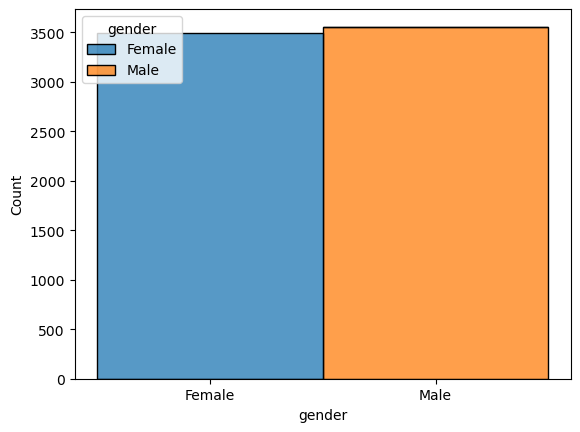

In [69]:
sns.histplot(data = data, x= "gender" , hue ="gender",multiple="stack" )

<Axes: xlabel='gender', ylabel='Count'>

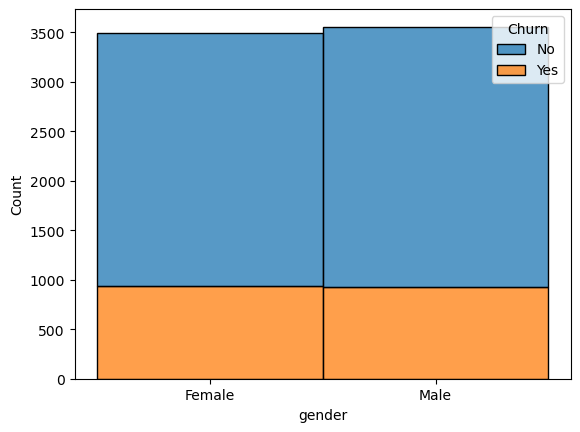

In [55]:
sns.histplot(data = data, x= "gender" , hue="Churn" ,  multiple="stack")

<Axes: xlabel='Churn', ylabel='Count'>

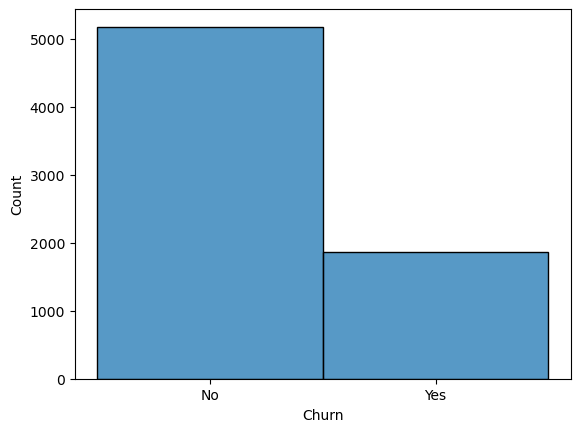

In [62]:
sns.histplot(data = data, x= "Churn")

Almost 70 % of the clients don't churn.

<Axes: xlabel='InternetService', ylabel='Count'>

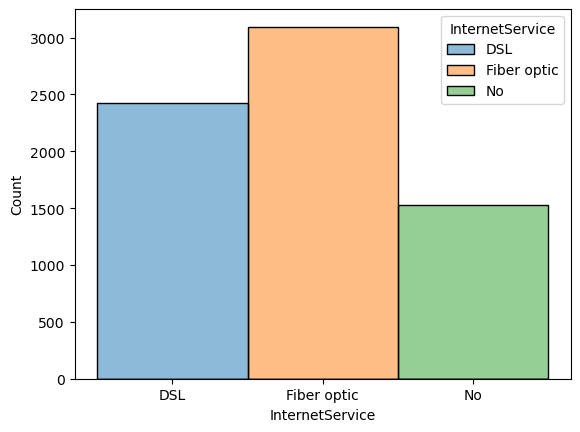

In [71]:
sns.histplot(data = data, x= "InternetService" , hue="InternetService", )

<Axes: xlabel='Contract', ylabel='Count'>

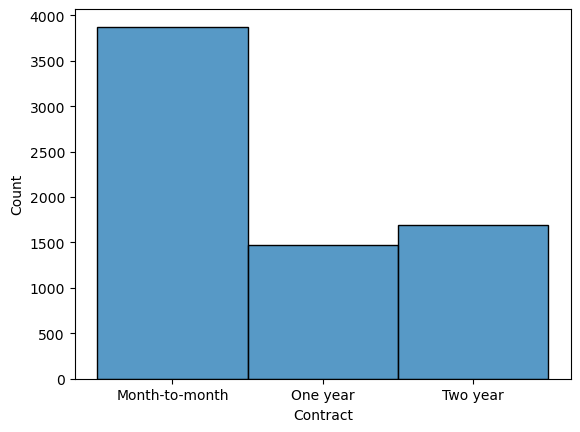

In [63]:
sns.histplot(data = data, x= "Contract")

<Axes: xlabel='PaymentMethod', ylabel='Count'>

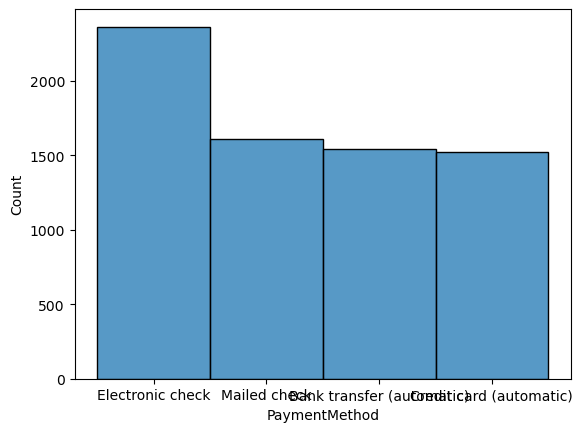

In [65]:
sns.histplot(data = data, x= "PaymentMethod")

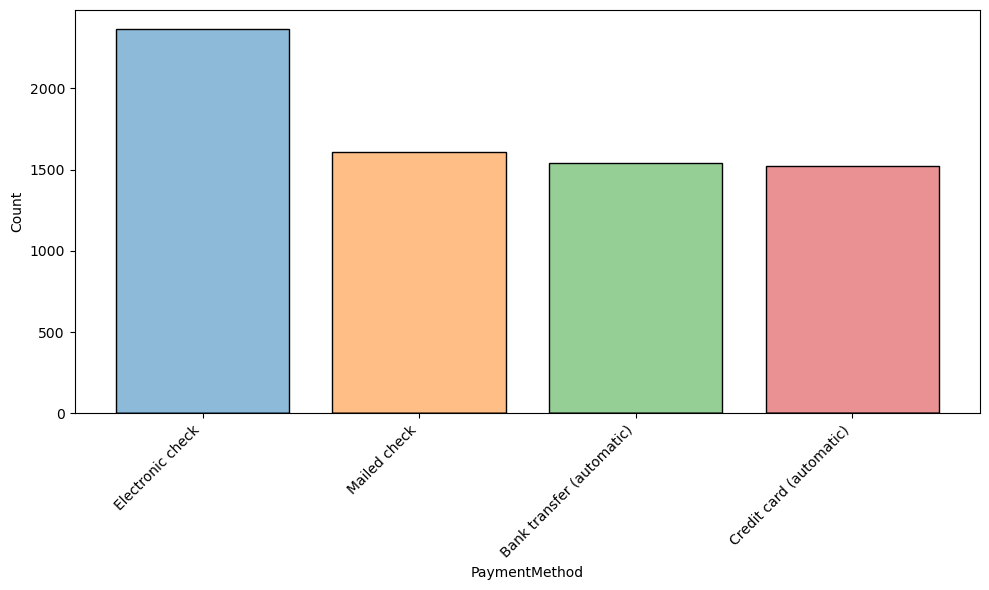

In [70]:
plt.figure(figsize=(10, 6))
# 2. Usamos shrink para separar las barras
# Usamos hue para que cada barra tenga su color automáticamente
sns.histplot(data=data, x="PaymentMethod", hue="PaymentMethod", shrink=0.8, legend=False)
# 3. Rotamos las etiquetas del eje X
plt.xticks(rotation=45, ha='right')
# Ajuste extra para que nada quede fuera del cuadro al guardar o mostrar
plt.tight_layout()

plt.show()

Our data seems very complete, let's see if we can find any relationship between the variables.

<Axes: xlabel='InternetService', ylabel='MonthlyCharges'>

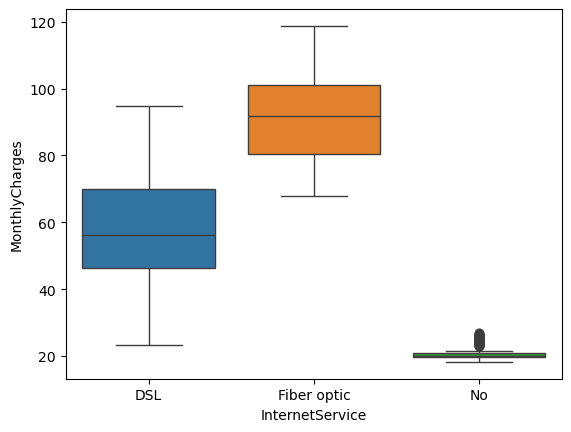

In [101]:
sns.boxplot(data=data , x= "InternetService", y="MonthlyCharges",  hue ="InternetService")

Observation : It can easily be seen that people who opted for Fiber Optic service have higher monthly charges 
People with a "DSL" service has significantly lower charges. 

<Axes: xlabel='InternetService', ylabel='TotalCharges'>

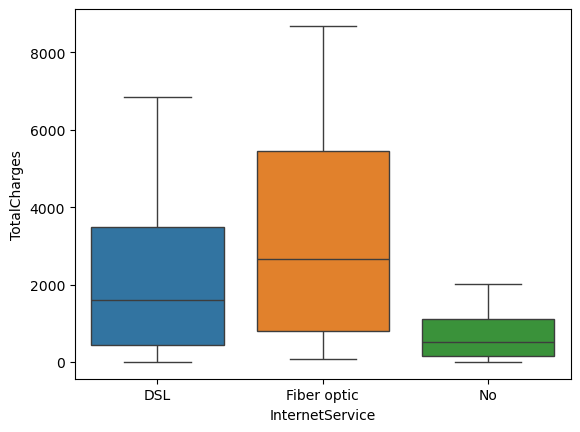

In [112]:
sns.boxplot(data=data , x= "InternetService", y="TotalCharges", hue ="InternetService" )

Observation: Even though Fiber optic clients do have higher total charges, the ranges are not very different from the DSL.

<Axes: xlabel='gender', ylabel='count'>

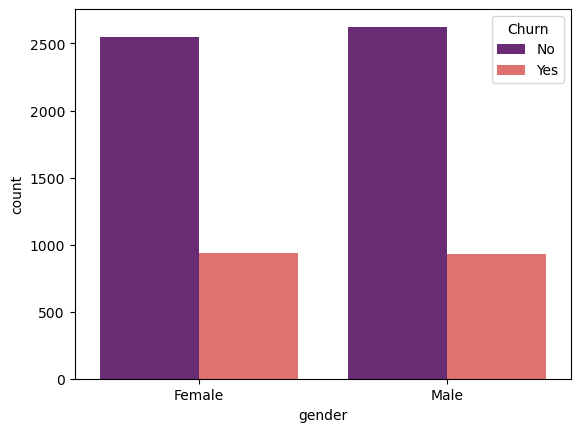

In [108]:
sns.countplot(data=data , x= "gender", hue ="Churn", palette='magma' )

Observation : Leaving the service is not a matter of gender.

<Axes: xlabel='Contract', ylabel='count'>

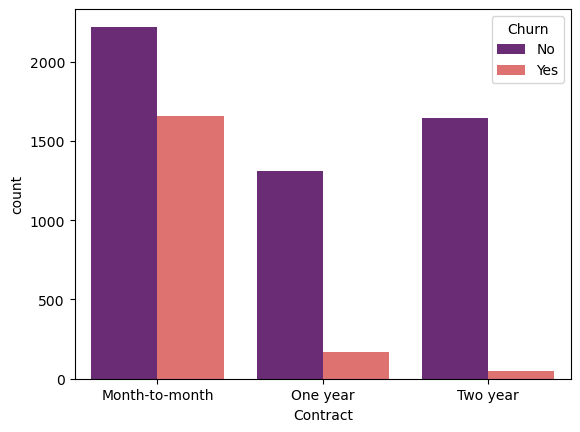

In [110]:
sns.countplot(data=data , x= "Contract", hue ="Churn", palette='magma' )

Observation: We can see a strong relationship between having a month to month contract and leaving the service. One and two year contracts seem to
hace very few churns. Here we can make our first hypothesis: "Clients with month to month contracts tend to leave more than those who has one or two years contracts".

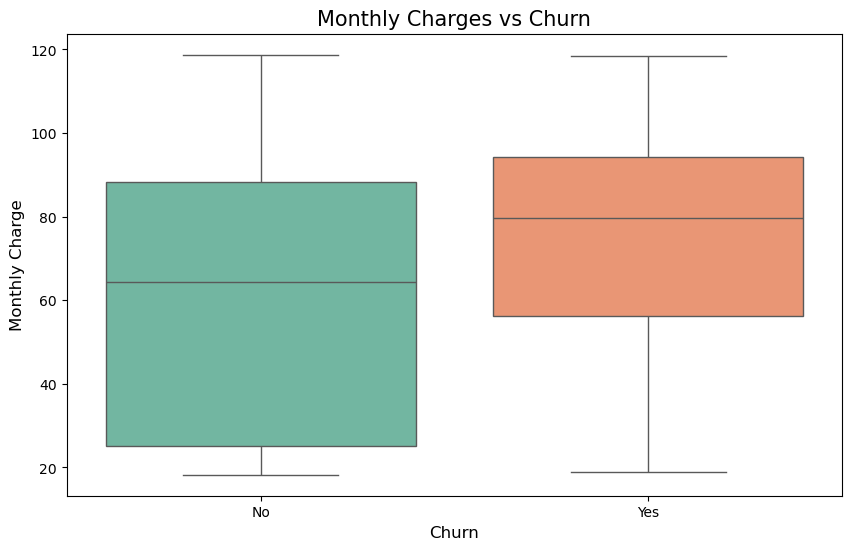

In [126]:
#sns.boxplot(data=data, y="MonthlyCharges", x ="Churn" , palette = "pastel" )
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=data, palette='Set2', hue ="Churn")

plt.title('Monthly Charges vs Churn', fontsize=15)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Monthly Charge', fontsize=12)

plt.show()

Observation: It is easy to see a strong relationship between having a higher monthly charge and leaving the service. This is going to be our second hypothesis.

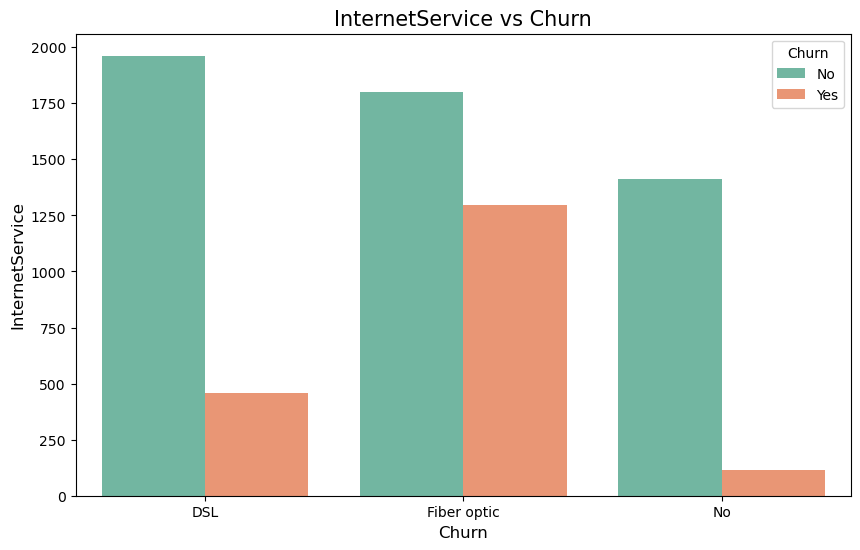

In [129]:
plt.figure(figsize=(10, 6))
sns.countplot( x='InternetService', data=data, palette='Set2', hue ="Churn")
plt.title('InternetService vs Churn', fontsize=15)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('InternetService', fontsize=12)

plt.show()

Observation: It can easily be seen that clients whose internet service is Fiber Optic tend to churn more than those who have DSL service. This is our last hypothesis.


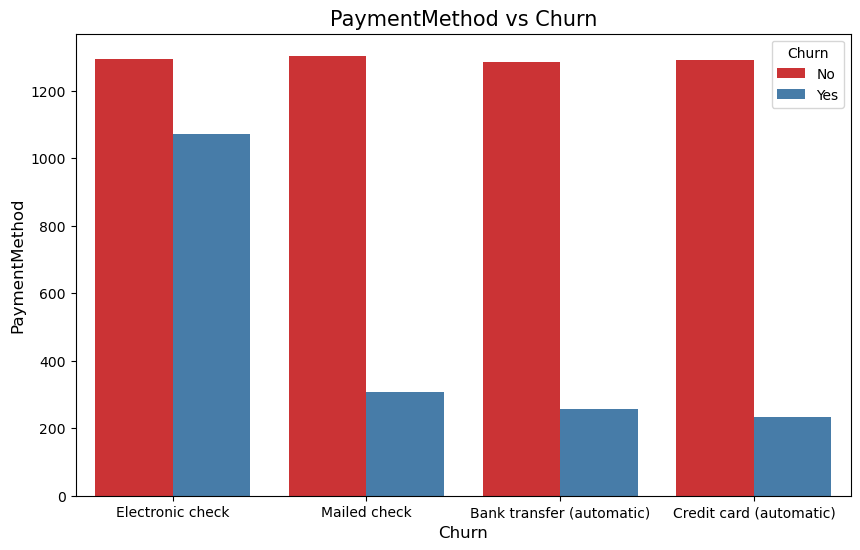

In [132]:
plt.figure(figsize=(10, 6))
sns.countplot( x='PaymentMethod', data=data, palette='Set1', hue ="Churn")
plt.title('PaymentMethod vs Churn', fontsize=15)
plt.xlabel('Churn', fontsize=12)
plt.ylabel("PaymentMethod", fontsize=12)

plt.show()

Observation: Clients whose payment method is electronic check tend to churn significantly more than those who have other payments methods.

In [147]:
copias = data.copy()

<Axes: xlabel='tenure_group', ylabel='count'>

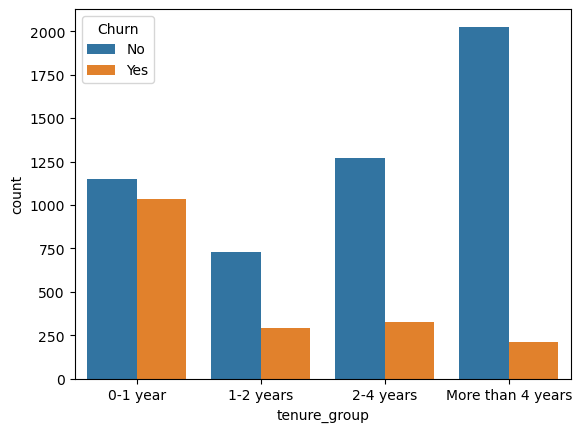

In [154]:

def transformar_tenure(meses):
    if meses <= 12:
        return '0-1 year'
    elif meses <= 24:
        return '1-2 years'
    elif meses <= 48:
        return '2-4 years'
    else:
        return 'More than 4 years'

copias['tenure_group'] = copias['tenure'].apply(transformar_tenure)

import seaborn as sns
sns.countplot(x='tenure_group', hue='Churn', data=copias, order=['0-1 year', '1-2 years', '2-4 years', 'More than 4 years'])

Observation: Clients tend to churn during the first year, once a client has passed thi period of time is more likely to stay.

# *Hypothesis Testing*
 "Clients with higher monthly charges have more probabilites of churn"

For this hypothesis testing we will compare medians of monthly charges from two different groups:
Group 1 :  Clients who churn 
Group 2 :  Clients who didn't churn
Definying our hypothesis:

$H_0: \mu_{churn} \le \mu_{no\_churn}$: The monthly charges for departing customers are less than or equal to those for customers who stay.

$H_1: \mu_{churn} > \mu_{no\_churn}$: The monthly charges for departing customers are significantly higher than those for customers who stay.

In [159]:
import scipy.stats as stats

In [160]:
churn_yes = data.loc[data.Churn == "Yes"]
churn_no = data.loc[data.Churn == "No"]

In [161]:
# Variable of interest
charges_yes = churn_yes.MonthlyCharges
charges_no = churn_no.MonthlyCharges

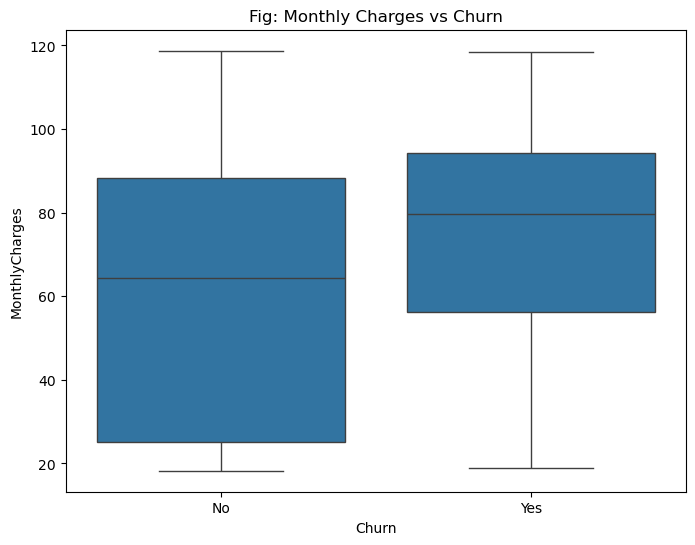

In [163]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=data).set(title="Fig: Monthly Charges vs Churn")
plt.show()


In [164]:
t_stat, p_val = stats.ttest_ind(charges_yes, charges_no)
p_value_onetail = p_val / 2
print(f"t_stat = {t_stat}")
print(f"p_value_onetail = {p_value_onetail}")

#  Conclution
# Level of Significance: We will choose a 5% significance level. Therefore, our alpha = 0.05.
# Statistical Test: We will use an independent samples t-test to compare the mean values of 'MonthlyCharges' 
# between customers who churned and those who stayed.Test Tail: Since our alternative hypothesis ($H_A$) states that
# the charges for customers who churn are greater than those who do not, this is a right-tailed test.Decision Rule: If the calculated
# p-value is less than our alpha ($\alpha$), we will reject the null hypothesis and conclude that the difference is statistically significant.

alpha = 0.05
if p_value_onetail < alpha:
    print(f"Conclusion: Since the p_value {p_value_onetail:.10f} is less than alpha {alpha}")
    print("We reject the null hypothesis (H0).")
    print("There is sufficient statistical evidence to conclude that churning customers pay higher monthly fees.")
else:
    print(f"Conclusion: Since the p_value {p_value_onetail:.10f} is greater than alpha {alpha}")
    print("We fail to reject the null hypothesis (H0).")

t_stat = 16.536738015936308
p_value_onetail = 1.3533228034442077e-60
Conclusion: Since the p_value 0.0000000000 is less than alpha 0.05
We reject the null hypothesis (H0).
There is sufficient statistical evidence to conclude that churning customers pay higher monthly fees.
